## PUBG Finish Placement Prediction

### Data loading and initial analysis

In [2]:
import numpy as np
import pandas as pd

In [3]:
#pubg_train = pd.read_csv('train.csv')
#pubg_test = pd.read_csv('test.csv') 
#Working with only 1000000 rows.

pubg_train = pd.read_csv('train.csv',nrows=1000000)
pubg_test = pd.read_csv('test.csv',nrows=1000000) 

In [3]:
pubg_train.head(6)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217
5,5,2200824,5,0,2,128.10,0,0,0,25,...,0,2221.0,0,0.0,0,0,1016.00,4,1500,0.9368


In [4]:
print("Max yval ",pubg_train['winPlacePerc'].max())

Max yval  1.0


In [5]:
print("Min yval ",pubg_train['winPlacePerc'].min())

Min yval  0.0


In [6]:
pubg_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,47734,1659463,47734,0,0,100.0,1,0,0,59,...,45,0,0.0,0,0.0,1,0,421.50,7,1500
1,47735,1659508,47735,0,1,400.0,2,0,3,9,...,47,1,0.0,0,0.0,0,0,655.80,4,1526
2,47736,1659555,47736,0,0,0.0,0,0,0,72,...,28,0,0.0,0,0.0,0,0,74.58,1,1475
3,47737,1659621,47737,0,0,68.6,0,0,0,68,...,92,0,0.0,0,0.0,0,0,167.20,2,1464
4,47738,1659675,47738,0,1,370.5,3,0,1,45,...,26,0,0.0,0,0.0,0,0,146.70,3,1505


In [7]:
pubg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
Id                 1000000 non-null int64
groupId            1000000 non-null int64
matchId            1000000 non-null int64
assists            1000000 non-null int64
boosts             1000000 non-null int64
damageDealt        1000000 non-null float64
DBNOs              1000000 non-null int64
headshotKills      1000000 non-null int64
heals              1000000 non-null int64
killPlace          1000000 non-null int64
killPoints         1000000 non-null int64
kills              1000000 non-null int64
killStreaks        1000000 non-null int64
longestKill        1000000 non-null float64
maxPlace           1000000 non-null int64
numGroups          1000000 non-null int64
revives            1000000 non-null int64
rideDistance       1000000 non-null float64
roadKills          1000000 non-null int64
swimDistance       1000000 non-null float64
teamKills          1000000 non-null int6

In [8]:
pubg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
Id                 1000000 non-null int64
groupId            1000000 non-null int64
matchId            1000000 non-null int64
assists            1000000 non-null int64
boosts             1000000 non-null int64
damageDealt        1000000 non-null float64
DBNOs              1000000 non-null int64
headshotKills      1000000 non-null int64
heals              1000000 non-null int64
killPlace          1000000 non-null int64
killPoints         1000000 non-null int64
kills              1000000 non-null int64
killStreaks        1000000 non-null int64
longestKill        1000000 non-null float64
maxPlace           1000000 non-null int64
numGroups          1000000 non-null int64
revives            1000000 non-null int64
rideDistance       1000000 non-null float64
roadKills          1000000 non-null int64
swimDistance       1000000 non-null float64
teamKills          1000000 non-null int6

In [9]:
pubg_train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [10]:
pubg_test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [11]:
print(pubg_train.shape,pubg_test.shape)

(1000000, 26) (1000000, 25)


### Divide the data in test and train

In [7]:
from sklearn.model_selection import train_test_split

X=pubg_train.drop(['winPlacePerc'],axis=1)
y=pubg_train['winPlacePerc']



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22,shuffle=True)

In [14]:
print('X_train.shape %s, X_test.shape %s\ny_train.shape %s, y_test.shape %s'%(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train.shape (700000, 25), X_test.shape (300000, 25)
y_train.shape (700000,), y_test.shape (300000,)


### Building a quick and dirty model

#### Linear Regression

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [16]:
#Create Linear Regression Model object
reg = linear_model.LinearRegression()

In [17]:
#Train Model using train dataset
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Make Prediction using cross validation set
y_pred = reg.predict(X_test)

In [19]:
# r2_score score: 1 is perfect prediction
r2Score=r2_score(y_test,y_pred)
print("Variance score (r2_score): %f"%r2Score)
print('Model accuracy:%.2f '%(r2Score*100))
 

Variance score (r2_score): 0.783937
Model accuracy:78.39 


In [20]:
print("Root mean squared error of test:%f"%sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error of test:0.144403


#### Neural Network Regression

In [10]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
mlp = MLPRegressor(solver='adam',hidden_layer_sizes=(5, 2), random_state=1)

In [26]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [27]:
y_pred = mlp.predict(X_test)

In [28]:
# r2_score score: 1 is perfect prediction
mlp_score=mlp.score(X_test,y_test)
print("Variance score (r2_score): %f"%mlp_score)
print('Model accuracy:%.2f '%(mlp_score*100))
 

Variance score (r2_score): 0.862523
Model accuracy:86.25 


In [29]:
print("Root mean squared error of test:%f"%sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error of test:0.115187


In [30]:
ytr_pred = mlp.predict(X_train)
print("Root mean squared error of test:%f"%sqrt(mean_squared_error(y_train,ytr_pred)))

Root mean squared error of test:0.114903


#### Boosted Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [32]:
dtr=DecisionTreeRegressor(max_depth=4)
dtr_boost=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300,random_state=12)

In [33]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
y_pred=dtr.predict(X_test)

In [35]:
# r2_score score: 1 is perfect prediction
dtr_score=dtr.score(X_test,y_test)
print("Variance score (r2_score): %f"%dtr_score)
print('Model accuracy:%.2f '%(dtr_score*100))
 

Variance score (r2_score): 0.788672
Model accuracy:78.87 


In [36]:
dtr_boost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=12)

In [37]:
y_pred=dtr_boost.predict(X_test)

In [38]:
# r2_score score: 1 is perfect prediction
dtrBoost_score=dtr_boost.score(X_test,y_test)
print("Variance score (r2_score): %f"%dtrBoost_score)
print('Model accuracy:%.2f '%(dtrBoost_score*100))
 

Variance score (r2_score): 0.805184
Model accuracy:80.52 


### Analysis of Algorithms used:
- Linear regression: Quick and simple. Fairly easy accurate.
- Neural Network: Slower compared to LR but much more accurate.
- Decision Tree Classifier: Very slow and almost same as LR

### Taking Neual network Forward!

In [39]:
import matplotlib.pyplot as plt

In [40]:
y_pred = mlp.predict(X_test)

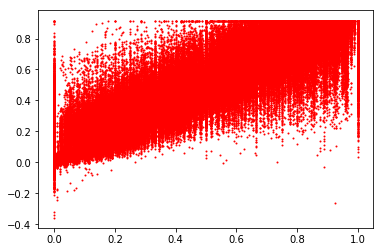

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.scatter(y_train, y_train, s=0.01, c='b', marker="s", label='real')
ax1.scatter(y_test,y_pred, s=1, c='r', marker="o", label='NN Prediction')
plt.show()

In [42]:
from sklearn.model_selection import learning_curve


In [43]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


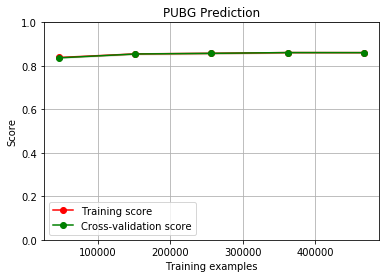

In [44]:
plt = plot_learning_curve(mlp,'PUBG Prediction',X_train, y_train, ylim=(0, 1), n_jobs=4)
#plt.show()

In [45]:
cols=pubg_train.columns
print(cols)
#X_train = pubg_train[]
pubg_train[['Id','groupId','matchId']].groupby(['groupId']).sum().head(10)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')


,Id,matchId
groupId,,
2,68192,0
7,885751,0
9,681812,0
10,1567684,0
12,3131939,0
16,1636513,0
18,5303885,0
21,1089189,0
24,136382,0


#### Finding Correlation between features
- Finding correlation between fetures help us to take only the feature which are contributing to guess the prediction right.

In [46]:
corr = pubg_train.corr()

In [53]:
corr

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,1.000000,0.004035,0.030850,-0.025182,-0.025397,-0.044239,-0.030377,-0.028651,-0.017471,0.036518,...,-0.012209,-0.010645,-0.003394,-0.002310,-0.001337,-0.001666,-0.019023,-0.021083,-0.039636,-0.024420
groupId,0.004035,1.000000,0.090008,0.002301,-0.002301,0.001675,0.002148,-0.000701,-0.002050,0.001827,...,-0.001581,-0.004820,0.000427,0.000563,-0.001258,-0.001413,-0.001274,0.001112,-0.000973,-0.003346
matchId,0.030850,0.090008,1.000000,0.003316,-0.000562,0.003449,0.003826,0.000919,0.000234,-0.002725,...,0.000400,0.000064,-0.001834,-0.000375,-0.000271,-0.000293,-0.000413,0.004713,-0.001677,0.001441
assists,-0.025182,0.002301,0.003316,1.000000,0.286071,0.477911,0.401529,0.265030,0.266253,-0.306454,...,0.229206,0.086128,0.010959,0.024340,0.011087,0.041158,0.260296,0.345766,0.076914,0.303418
boosts,-0.025397,-0.002301,-0.000562,0.286071,1.000000,0.487304,0.319702,0.324220,0.533060,-0.534764,...,0.256411,0.309713,0.040541,0.116210,-0.003703,0.073214,0.645988,0.319813,0.136247,0.617536
damageDealt,-0.044239,0.001675,0.003449,0.477911,0.487304,1.000000,0.781660,0.647569,0.390635,-0.649783,...,0.286839,0.124995,0.050795,0.039271,0.057016,0.063461,0.363792,0.452426,0.112647,0.428456
DBNOs,-0.030377,0.002148,0.003826,0.401529,0.319702,0.781660,1.000000,0.535593,0.298390,-0.534726,...,0.303948,0.066648,0.031435,0.018952,0.073703,0.039660,0.239429,0.351893,0.085371,0.276430
headshotKills,-0.028651,-0.000701,0.000919,0.265030,0.324220,0.647569,0.535593,1.000000,0.242832,-0.470289,...,0.180959,0.063745,0.017363,0.029616,0.014756,0.030566,0.237708,0.301376,0.066726,0.280298
heals,-0.017471,-0.002050,0.000234,0.266253,0.533060,0.390635,0.298390,0.242832,1.000000,-0.393398,...,0.250980,0.271841,0.028966,0.079159,0.012177,0.053522,0.420389,0.311968,0.085975,0.423645
killPlace,0.036518,0.001827,-0.002725,-0.306454,-0.534764,-0.649783,-0.534726,-0.470289,-0.393398,1.000000,...,-0.281879,-0.201115,-0.051331,-0.091837,-0.030334,-0.056616,-0.569906,-0.437775,-0.140123,-0.699453


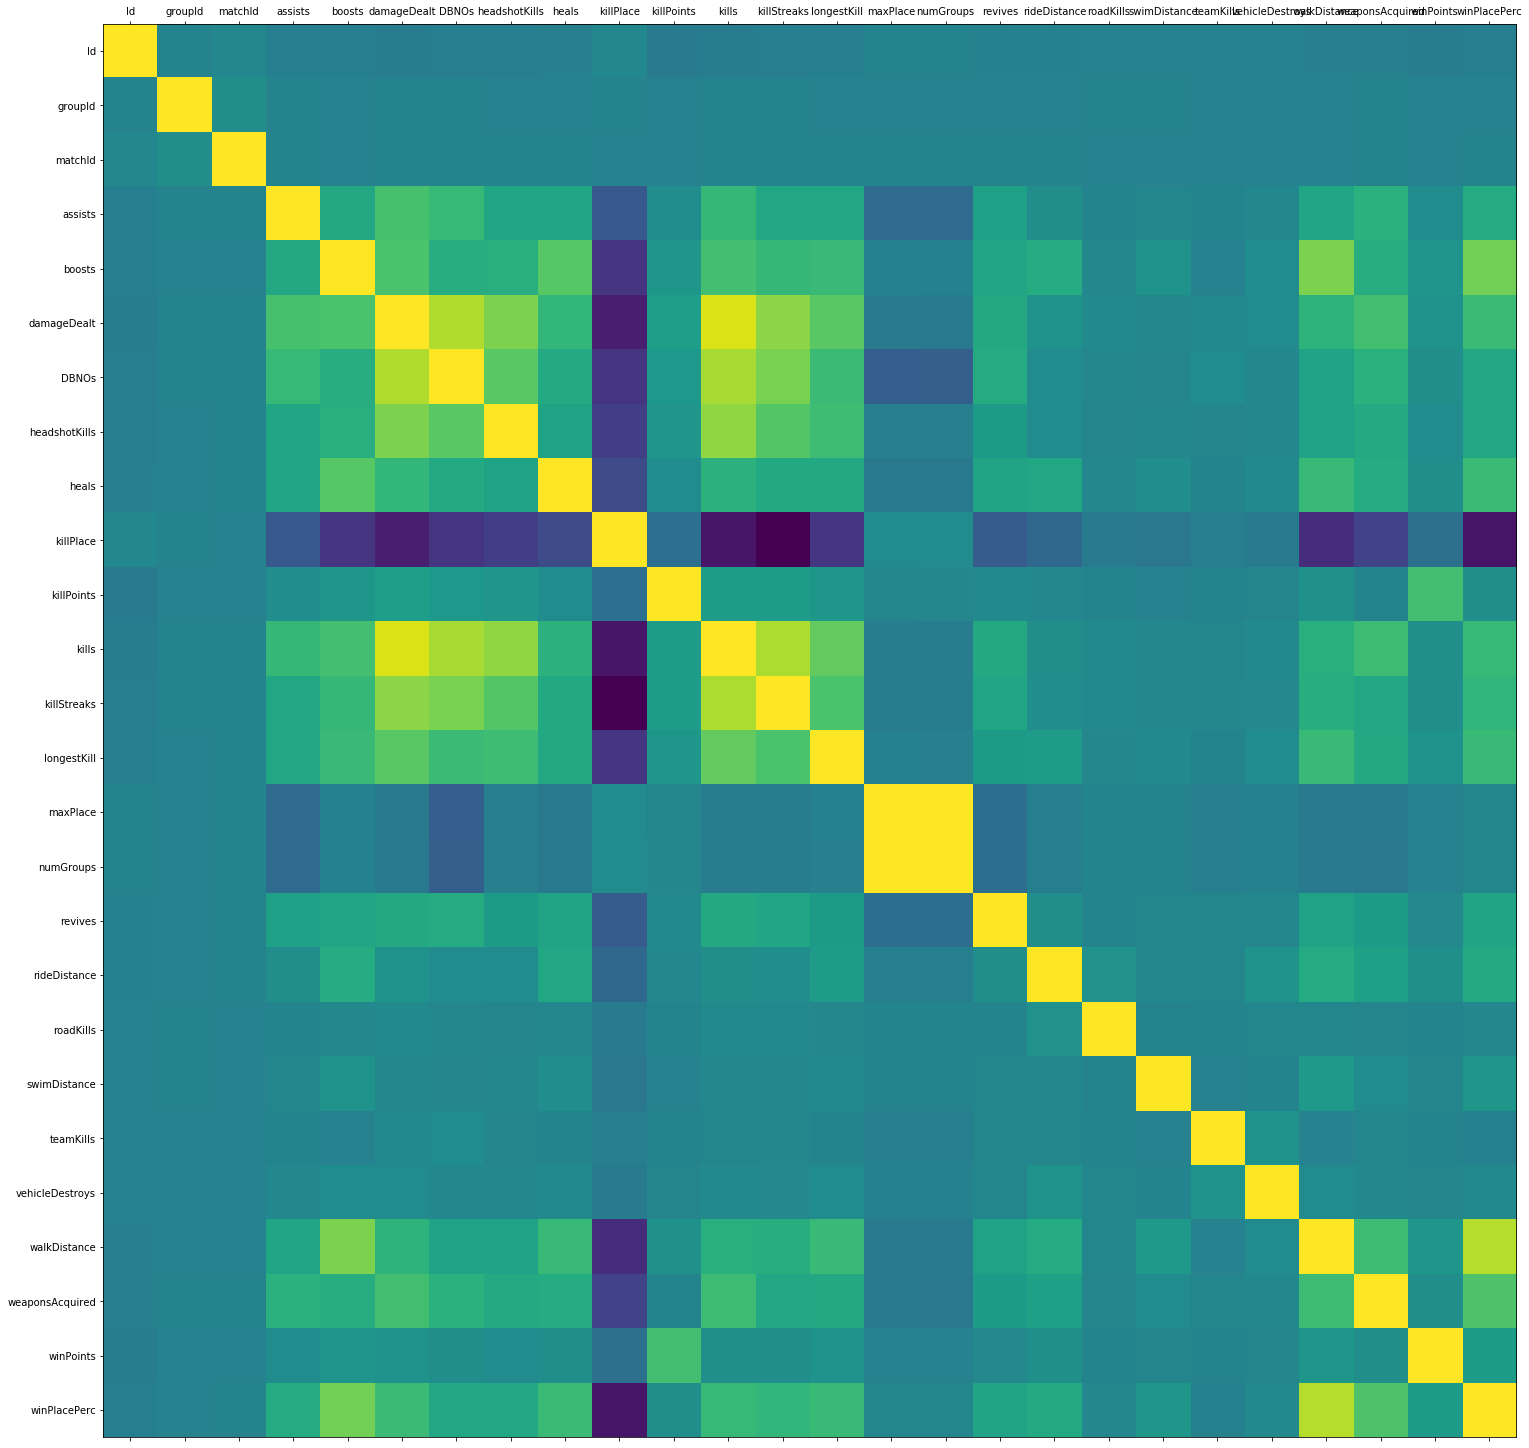

In [54]:
fig,ax = plt.subplots(figsize=(26,26))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [4]:
#df=pubg_train.drop(['Id','groupId','matchId','killPlace','teamKills'],axis=1,inplace=False)
df=pubg_train.drop(['walkDistance','boosts'],axis=1,inplace=False)

In [5]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [8]:

X=df.drop(['winPlacePerc'],axis=1)
y=df['winPlacePerc']

dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(X, y, test_size=0.3, random_state=22,shuffle=True)

In [16]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(dfx_train)
dfx_train = scaler.transform(dfx_train)
dfx_test = scaler.transform(dfx_test)
mlp = MLPRegressor(solver='adam',hidden_layer_sizes=(5, 2), random_state=1)



TypeError: __init__() got an unexpected keyword argument 'regularization'

In [12]:
mlp.fit(dfx_train,dfy_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [13]:
df_pred=mlp.predict(dfx_test)

In [14]:
# r2_score score: 1 is perfect prediction
mlp_score=mlp.score(dfx_test,dfy_test)
print("Variance score (r2_score): %f"%mlp_score)
print('Model accuracy:%.2f '%(mlp_score*100))
 

Variance score (r2_score): 0.812599
Model accuracy:81.26 


 #### Oops it backfired...